<a href="https://colab.research.google.com/github/Ambogo2/Retail-Sales-Analysis-Using-Python/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Loading the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Retail-Sales-Analysis/Data/retail-sales-data.csv",  encoding='latin1')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Data Exploration and Cleaning


In [5]:
# checking all columns
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
# checking the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
# getting the statistical description
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
# getting no of records
df.shape

(2823, 25)

2823 observations and 25 features

## Data Preprocessing

In [12]:
# checking for null values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [15]:
# dropping unused columns
df.drop(['POSTALCODE', 'TERRITORY', 'ADDRESSLINE2', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'PHONE'], axis=1)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,USA,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,France,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,France,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,USA,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",Torikatu 38,Oulu,NaN,Finland,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,"C/ Moralzarzal, 86",Madrid,NaN,Spain,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,1 rue Alsace-Lorraine,Toulouse,NaN,France,Small


In [13]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataset

## Exploratory Data Analysis

### What is the overall sales trend?

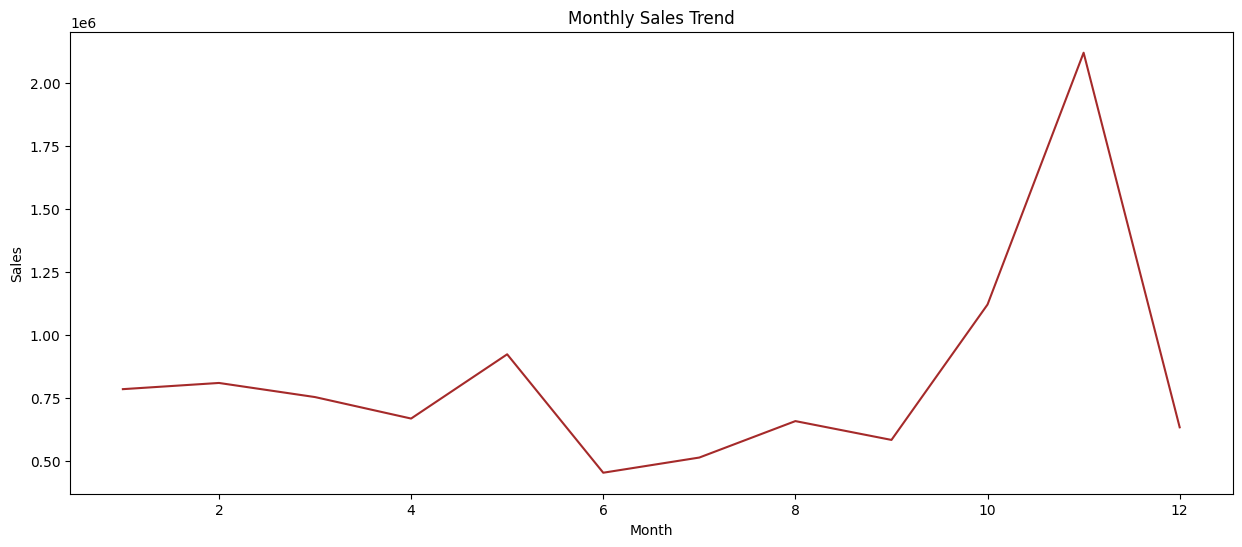

In [43]:
# Total sales by month
df_trend = df.groupby('MONTH_ID')['SALES'].sum().reset_index()

# visualizing
plt.figure(figsize=(15, 6))
plt.plot(df_trend['MONTH_ID'], df_trend['SALES'], color="brown")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

### Which product generated most sales?

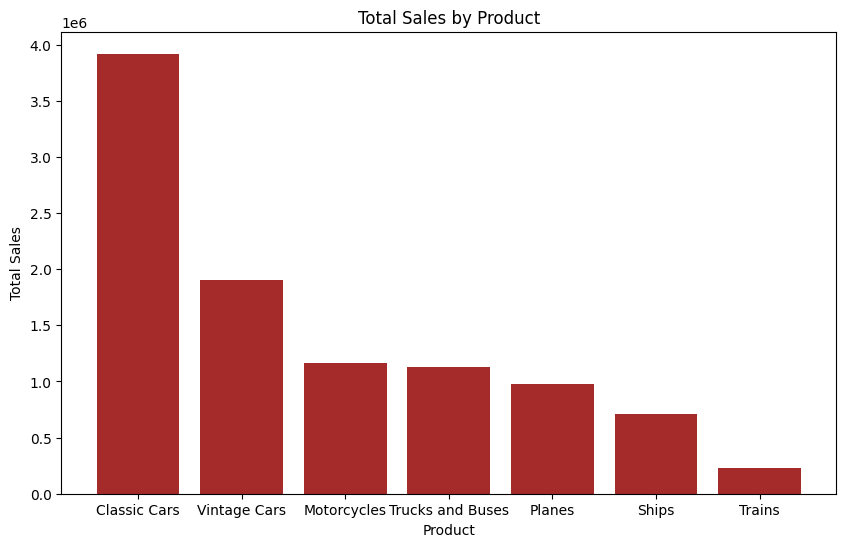

In [31]:
# Total sales by product
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

# Sorting the data by sales in descending order
product_sales = product_sales.sort_values(by='SALES', ascending=False)

# Plotting a bar plot
plt.figure(figsize=(10, 6))
plt.bar(product_sales['PRODUCTLINE'], product_sales['SALES'], color='brown')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')
plt.show()

### Which top 10 cities generated most sales?

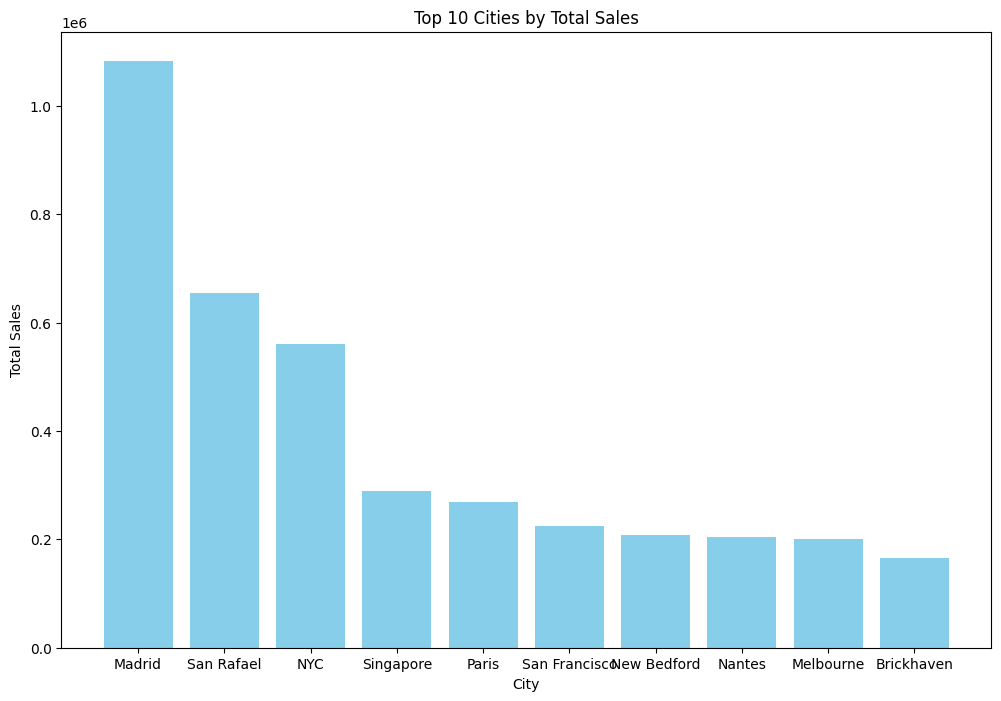

In [41]:
# Total sales by city
city_sales = df.groupby('CITY')['SALES'].sum().reset_index()

# Sorting the data by sales in descending order and select top 10 cities
top_10_city_sales = city_sales.sort_values(by='SALES', ascending=False).head(10)

# Visualizing using a bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_10_city_sales['CITY'], top_10_city_sales['SALES'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top 10 Cities by Total Sales')
plt.show()

### What is the total sales by deal size?

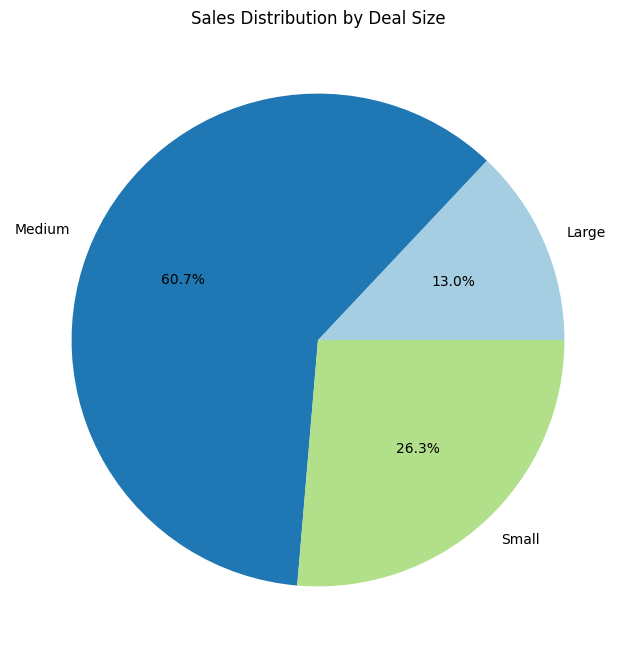

In [47]:
# total sales by deal size
deal_size_sales = df.groupby('DEALSIZE')['SALES'].sum().reset_index()

# visualizing using a pie chart
plt.figure(figsize=(10, 8))
plt.pie(deal_size_sales['SALES'], labels=deal_size_sales['DEALSIZE'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Deal Size')
plt.show()

In [40]:
# Calculating total sales
total_sales = df['SALES'].sum()

# Calculating total order quantity
total_order_qty = df['QUANTITYORDERED'].count()

print(f'Total Sales: ${total_sales:.2f}')
print(f'Total Order Quantity: {total_order_qty}')

Total Sales: $10032628.85
Total Order Quantity: 2823


## Insights and conclusion

* Total sales is $10 Million with a total order quantity of 2,823 orders.
* Medium size deals had the highest number of sales distibution
* Madrid generates the highest sales by city followed by San Rafael
* Classic cars generated most sales







